**Keras Tutorial with the Fashion-MNIST Dataset**

Short introduction to building an image classifier using `keras`

In [38]:
import kaggle
import pandas as pd
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [18]:
# Load the dataset
kaggle.api.authenticate()
kaggle.api.dataset_download_files('zalando-research/fashionmnist', path='data/', unzip=True)

In [20]:
data = pd.read_csv('data/fashion-mnist_train.csv')

**Understanding the data**

Each image is 28 x 28 pixels = 784 pixels

Each column represents a single pixel in the grayscale image. The pixel value describes its brightness.
- 0 (lowest value) is black
- 255 (highest value) is white
- anything in between is a shade of gray

In [21]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Preprocessing the data**
- divide by 255 to speed up the training process and to achieve more precision

In [55]:
y = data['label']
X = data.drop(columns='label')/255

num_rows, num_cols = 28, 28
num_classes = len(set(y))

In [56]:
y.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

Reshape `X` to capture the spatial relationship

In [57]:
X = np.array(X)
X = X.reshape(X.shape[0], num_rows, num_cols, 1)
X[:5]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

Use `matplotlib` to visualize the image

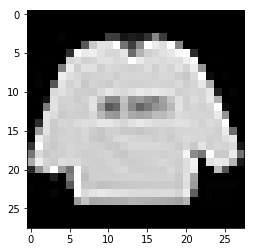

In [76]:
import matplotlib.pyplot as plt
plt.imshow(X[0].reshape(28,28), cmap='gray')

One-hot encode the target

In [58]:
y = np.eye(num_classes)[np.array(y.astype(int)).reshape(-1)]
# preview the one hot encoded target
y[:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

**Define the CNN**
Our input shape is `(num_rows, num_cols, num_channels)`. Since our images are grayscale, `num_channels = 1`. Otherwise it would be 3 (red, green and blue).
- `Sequential`: the `Sequential` model is a linear stack of layers (https://keras.io/getting-started/sequential-model-guide/)
- `Conv2D`: performs 2D spatial convolution (typically over images). A convolution. The kernel (which we define to be 3 x 3) is used to slide over the image. Each unique 3 x 3 square is distilled to a single value using elementwise multiplication
- `MaxPooling2D`: a dimentionality reduction technique which retrieves the largest value from a 2 x 2 block to create a smaller representation
- `Dropout`: a regularization technique by dropping out units from the neural network to prevent overfitting -- here 10% of units are dropped
- `Flatten`: we flatten the input for the subsequent layers as we no longer care about the spatial relationship
- `Dense`: "regular" neural network layer. The last `dense` layer is particularly important because it is used to map the class probabilities

**Other parameters**
 - `categorical_crossentropy` -> loss function that the model wants to minimize (used for categorical classification)
 - `adam` is a unique optimizer that uses the Adam algorithm
 - setting `metrics=['accuracy']` allows us to visualize accuracy over the training process
 - `softmax` and `relu` are activation functions - `softmax` is typically used in the last dense layer for calculating the class probabilities

In [59]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(num_rows, num_cols, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_21 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               991360    
__________

**Train the model**
- `batch_size`: number of samples propagated through the network at once (smaller batch sizes = less memory used)
- `epochs`: number of times the entire dataset is passed for training

This is a simplistic example with no train/test/validation split. Look into `train_test_split` from `sklearn` for partitioning this data. A small number of epochs is used to show how this works.

In [62]:
model.fit(X, y, batch_size=32, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 45s 753us/step - loss: 0.2526 - acc: 0.9074
Epoch 2/3
60000/60000 [==============================] - 45s 744us/step - loss: 0.2256 - acc: 0.9178
Epoch 3/3
60000/60000 [==============================] - 48s 792us/step - loss: 0.2083 - acc: 0.9220
